## Tutorial: https://r9y9.github.io/nnmnkwii/latest/nnmnkwii_gallery/notebooks/00-Quick%20start%20guide.html

In [11]:
%pylab inline 
rcParams["figure.figsize"] = (16, 5)
from IPython.display import Audio
import librosa.display

Populating the interactive namespace from numpy and matplotlib


/home/pritish/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'linalg', 'info', 'fft', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


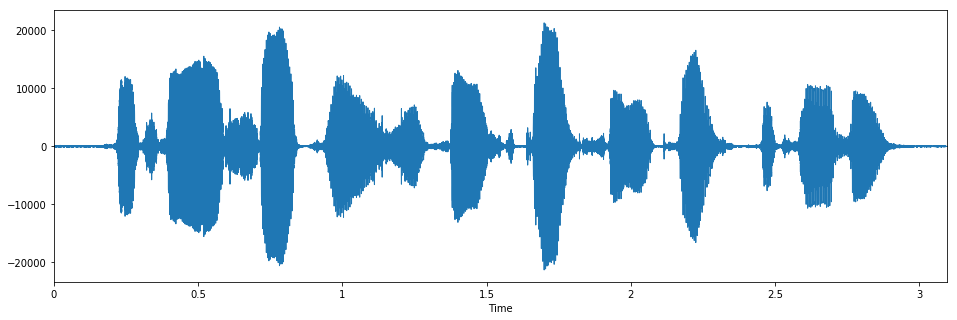

In [39]:
from nnmnkwii.util import example_audio_file
from scipy.io import wavfile

fs, x = wavfile.read(example_audio_file())
assert fs == 16000

librosa.display.waveplot(x.astype(np.float64), sr=fs)
Audio(x, rate=fs)

80
(620,) (620,)
[[1.14223118e+02 1.14233548e+02 1.14264716e+02 ... 2.21422561e-01
  2.20626938e-01 2.20363713e-01]
 [7.68424734e+03 7.68241375e+03 7.67706192e+03 ... 2.17172283e+00
  2.20278050e+00 2.21321765e+00]
 [5.18991589e+04 5.19127168e+04 5.19420524e+04 ... 2.02690728e+00
  2.01556726e+00 2.01179656e+00]
 ...
 [1.32913442e+04 1.32958090e+04 1.33089860e+04 ... 2.86179399e-01
  2.80909838e-01 2.79164330e-01]
 [5.62116424e+03 5.62188340e+03 5.62401763e+03 ... 2.63097092e+00
  2.62422290e+00 2.62198296e+00]
 [1.35959133e-16 1.46164195e-16 1.56887671e-16 ... 1.05232974e-16
  1.03858972e-16 1.07391867e-16]]
[[1.14223118e+02 1.14233548e+02 1.14264716e+02 ... 2.21422561e-01
  2.20626938e-01 2.20363713e-01]
 [7.68424734e+03 7.68241375e+03 7.67706192e+03 ... 2.17172283e+00
  2.20278050e+00 2.21321765e+00]
 [5.18991589e+04 5.19127168e+04 5.19420524e+04 ... 2.02690728e+00
  2.01556726e+00 2.01179656e+00]
 ...
 [2.15277595e+03 2.15343220e+03 2.15539109e+03 ... 2.44842392e-01
  2.42085683e-0

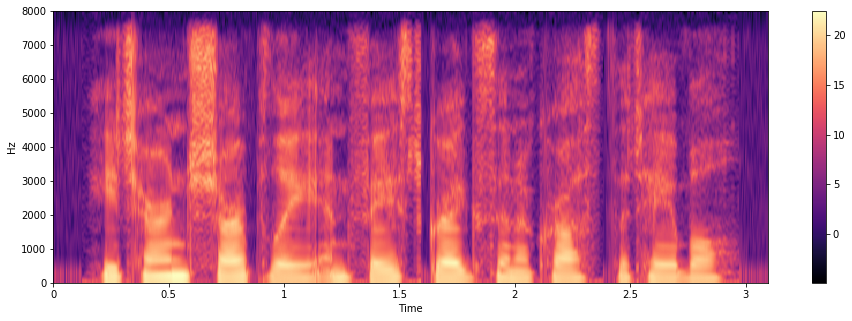

In [40]:
import pyworld

frame_period = 5 
hop_length = int(0.001 * fs * frame_period)
print(hop_length)

x = x.astype(np.float64)
f0, timeaxis = pyworld.harvest(x, fs, frame_period = frame_period)
print(f0.shape, timeaxis.shape)

spectogram = pyworld.cheaptrick(x, f0, timeaxis, fs)

aperiodicity = pyworld.d4c(x, f0, timeaxis, fs)

from nnmnkwii.preprocessing import trim_zeros_frames
print(np.where(spectogram))
spectogram = trim_zeros_frames(spectogram)
print(spectogram)
librosa.display.specshow(np.log(spectogram).T, sr = fs, 
                        hop_length = hop_length, x_axis = "time",
                        y_axis="linear", cmap="magma")
colorbar()

In [52]:
from nnmnkwii.util import example_label_file
from nnmnkwii.io import hts

labels = hts.load(example_label_file())
print(labels[0])
dir(labels)

(0, 50000, 'x^x-sil+hh=iy@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:1+1+2/D:0_0/E:x+x@x+x&x+x#x+x/F:content_1/G:0_0/H:x=x@1=2|0/I:4=3/J:13+9-2[2]')


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'contexts',
 'end_times',
 'is_state_alignment_label',
 'load',
 'num_frames',
 'num_phones',
 'num_states',
 'set_durations',
 'silence_frame_indices',
 'silence_label_indices',
 'silence_phone_indices',
 'start_times']

200
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25 585 586 587 588 589 590 591 592 593 594
 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612
 613 614]
(615, 513) (619, 513)
(559, 513)


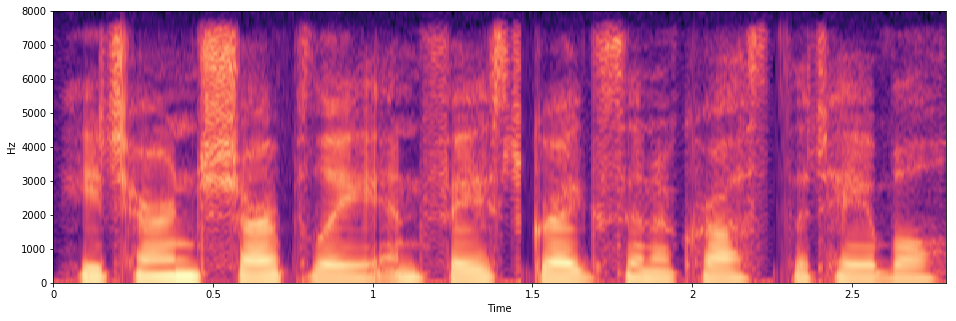

In [60]:
# Cut the silence frames
print(len(labels))
silence_indices = labels.silence_frame_indices()
trimmed_spectogram = spectogram[:labels.num_frames()]
print(labels.silence_frame_indices())
print(trimmed_spectogram.shape, spectogram.shape)

silence_removed_spectogram = np.delete(trimmed_spectogram, 
                                       silence_indices, axis = 0)

librosa.display.specshow(np.log(silence_removed_spectogram).T, 
                                sr = fs, 
                                hop_length = hop_length,
                                x_axis = "time",
                                y_axis = "linear",
                                cmap = "magma")
print(silence_removed_spectogram.shape)

In [62]:
silence_removed_f0 = np.delete(f0[:labels.num_frames()], 
                                  silence_indices)
silence_removed_aperiodicity = np.delete(aperiodicity[:labels.num_frames()],
                                        silence_indices,
                                        axis = 0)
assert len(silence_removed_f0) == len(silence_removed_aperiodicity) == len(silence_removed_spectogram)

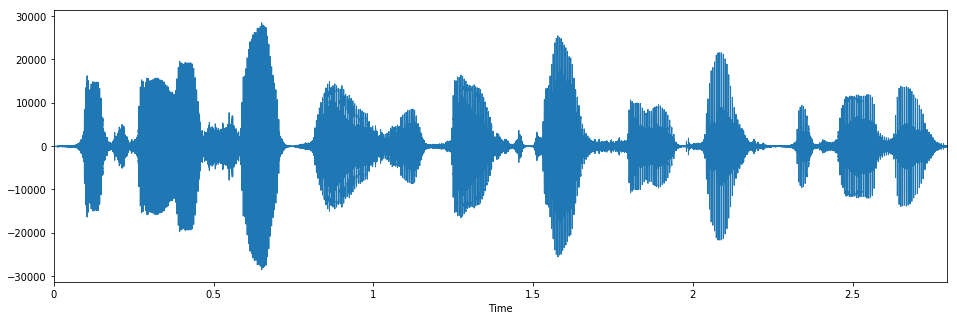

In [63]:
y = pyworld.synthesize(silence_removed_f0,
                        silence_removed_spectogram,
                        silence_removed_aperiodicity,
                        fs, 
                        frame_period)
librosa.display.waveplot(y, sr = fs)
Audio(y, rate=fs)

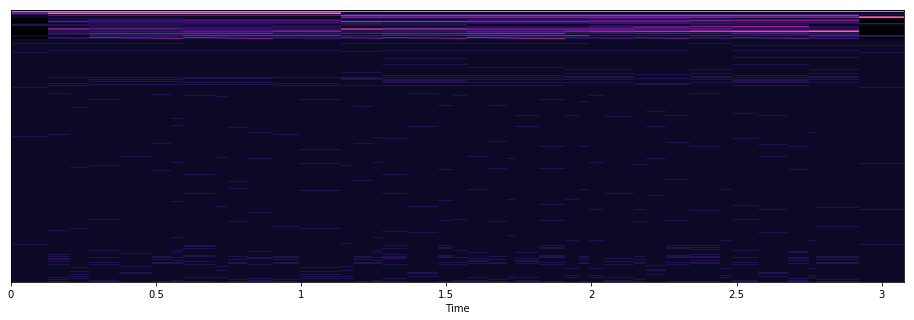

In [77]:
from nnmnkwii.frontend import merlin as fe
from nnmnkwii.util import example_question_file

binary_dict, continuous_dict = hts.load_question_set(example_question_file())
linguistic_features = fe.linguistic_features(labels, binary_dict, continuous_dict,
                                            add_frame_features=True)

librosa.display.specshow(linguistic_features.T,
                            sr = fs, 
                            hop_length=hop_length,
                            x_axis = "time",
                            cmap = "magma")

re.compile(r'\-ae\+', re.UNICODE)

In [85]:
from nnmnkwii.util import example_file_data_sources_for_acoustic_model
from nnmnkwii.datasets import FileSourceDataset

X, Y = example_file_data_sources_for_acoustic_model()
X, Y = FileSourceDataset(X), FileSourceDataset(Y)

for index, x in enumerate(X):
    print(index, x.shape)

0 (578, 425)
1 (675, 425)
2 (606, 425)


[578, 675, 606]
